In [56]:
# importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [57]:
# Read in the events data
countryIndi = pd.read_csv('../WEEK 3/Indicators/Country_Indicators.csv')
country = pd.read_csv('../WEEK 3/Indicators/Country.csv')
economicIndi = pd.read_csv('../WEEK 3/Indicators/Economic_Indicators.csv')
enviroIndi= pd.read_csv('../WEEK 3/Indicators/Environmental_Indicators.csv')
qpsdIndi= pd.read_csv('../WEEK 3/Indicators/Public_Debt_Indicators_Agg.csv')
socialIndi= pd.read_csv('../WEEK 3/Indicators/Social_Indicators.csv')
statIndi= pd.read_csv('../WEEK 3/Indicators/Statistical_Indicators.csv')
yearIndi= pd.read_csv('../WEEK 3/Indicators/Year_Table.csv')



In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('../culminating-project-group-2/Database/team2_DB.db')  # Replace with your database file

# Step 1: Retrieve all table names in the database
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_tables, conn)

# Print table names
print("Tables in the database:")
print(tables['name'].tolist())  # Convert DataFrame column to a list




Tables in the database:
['sqlite_sequence', 'Year_Table', 'Country_Year', 'Country_Indicators', 'Economic_Indicators', 'Environmental_Indicators', 'Public_Debt_Indicators_Agg', 'Social_Indicators', 'Statistical_Indicators', 'Country']


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('../culminating-project-group-2/Database/team2_DB.db')  # Replace with your database file

# Define the SQL query
query = """
    SELECT DISTINCT e."Country Code"
    FROM "Environmental_Indicators" e
    INNER JOIN "Public_Debt_Indicators_Agg" p ON e."Country Code" = p."Country Code"
    INNER JOIN "Economic_Indicators" ec ON e."Country Code" = ec."Country Code"
    INNER JOIN "Social_Indicators" s ON e."Country Code" = s."Country Code"
    INNER JOIN "Statistical_Indicators" si ON e."Country Code" = si."Country_Code"
    INNER JOIN "Country_Indicators" cy ON e."Country Code" = cy."Country Code";
"""

# Execute query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Count distinct countries
common_country_count = df["Country Code"].nunique()

# Concatenate country codes into a single string
common_countries = ", ".join(df["Country Code"].unique())

# Print results
print(f"Common Country Count: {common_country_count}")
print(f"Common Countries: {common_countries}")

# Close connection
conn.close()


Common Country Count: 106
Common Countries: ALB, ARG, ARM, AUS, AUT, BGD, BRB, BEL, BOL, BIH, BWA, BRA, BGR, BFA, KHM, CAN, CHL, CHN, COL, COD, CRI, CIV, HRV, CYP, CZE, DNK, DOM, SLV, EST, FJI, FIN, FRA, GEO, DEU, GRC, GTM, HND, HUN, ISL, IDN, IRL, ISR, ITA, JPN, KAZ, KEN, KOR, XKX, KGZ, LVA, LBN, LSO, LTU, LUX, MDG, MWI, MYS, MDV, MLT, MUS, MEX, MDA, MNG, MAR, NPL, NLD, NZL, NIC, NGA, MKD, NOR, PAK, PNG, PRY, PER, PHL, POL, PRT, ROU, RUS, RWA, SAU, SEN, SRB, SYC, SVK, SVN, SLB, ZAF, ESP, LKA, LCA, SUR, SWE, CHE, TJK, TZA, THA, TLS, TGO, TON, TUR, UGA, GBR, USA, URY


In [65]:
# List of DataFrames
dataframes = {'df1': countryIndi, 'df2': country, 'df3': economicIndi, 'df4': enviroIndi, 'df5': qpsdIndi, 'df6': socialIndi, 'df7': statIndi, 'df8': yearIndi}

# Function to calculate overall missing data percentage
def total_missing_percentage(df):
    total_missing = df.isnull().sum().sum()  # Total missing values in DataFrame
    total_values = df.size  # Total number of values in DataFrame
    return (total_missing / total_values) * 100

# Creating a dictionary to store overall missing data percentage
missing_data_summary = {name: total_missing_percentage(df) for name, df in dataframes.items()}

# Converting to DataFrame for better visualization
missing_summary_df = pd.DataFrame(missing_data_summary.items(), columns=['DataFrame', 'Missing Percentage'])

In [66]:
countryIndi.head(30)

,Country Name,Country Code,Time,Time Code,Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]
0,Afghanistan,AFG,2021.0,YR2021,-19.50573346,..,13621070039,-21.38008956,..,340.5232436
1,Afghanistan,AFG,2022.0,YR2022,..,..,..,..,..,..
2,Afghanistan,AFG,2023.0,YR2023,..,..,..,..,..,..
3,Albania,ALB,2021.0,YR2021,11.05709518,11130019640,14797555219,12.09128911,3958.514148,5262.913596
4,Albania,ALB,2022.0,YR2022,..,..,..,..,..,..
5,Albania,ALB,2023.0,YR2023,..,..,..,..,..,..
6,Algeria,DZA,2021.0,YR2021,3.613816011,1.37377E+11,1.25759E+11,1.949443056,3069.116841,2809.555594
7,Algeria,DZA,2022.0,YR2022,..,..,..,..,..,..
8,Algeria,DZA,2023.0,YR2023,..,..,..,..,..,..
9,American Samoa,ASM,2021.0,YR2021,..,..,..,..,..,..


In [67]:
missing_summary_df.head(30)

,DataFrame,Missing Percentage
0,df1,1.359703
1,df2,86.000000
2,df3,0.619002
3,df4,0.600023
4,df5,0.000000
5,df6,0.619344
6,df7,0.000000
7,df8,0.000000


Summary Table: Key Differences
Indicator	What It Measures	Unit	Includes Inflation?
ANNI (Annual % Growth)	Growth rate of total adjusted net income	% Growth	No
ANNI (Constant US$)	Total adjusted net income	2015 US$	No
ANNI (Current US$)	Total adjusted net income	US$	Yes
ANNI Per Capita (Annual % Growth)	Growth rate of per capita adjusted net income	% Growth	No
ANNI Per Capita (Constant US$)	Adjusted net income per person	2015 US$	No
ANNI Per Capita (Current US$)	Adjusted net income per person	US$	Yes

In [68]:
countryIndi.isnull().sum()

Country Name                                                                        11
Country Code                                                                        11
Time                                                                                11
Time Code                                                                           11
Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]                  11
Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]                   11
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]                         11
Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]    11
Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]     11
Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]           11
dtype: int64

In [69]:
countryIndi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country Name                                                                      798 non-null    object 
 1   Country Code                                                                      798 non-null    object 
 2   Time                                                                              798 non-null    float64
 3   Time Code                                                                         798 non-null    object 
 4   Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]                798 non-null    object 
 5   Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]                 798 non-null    object 
 6   Ad

In [70]:
# Calculate the percentage of missing values for each column
missing_percentage = (countryIndi.isnull().sum() / len(countryIndi)) * 100

# Convert to DataFrame for better readability
missing_df = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the DataFrame in descending order of missing percentage
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)


missing_df.head(20)

,Column Name,Missing Percentage
0,Country Name,1.359703
1,Country Code,1.359703
2,Time,1.359703
3,Time Code,1.359703
4,Adjusted net national income (annual % growth)...,1.359703
5,Adjusted net national income (constant 2015 US...,1.359703
6,Adjusted net national income (current US$) [NY...,1.359703
7,Adjusted net national income per capita (annua...,1.359703
8,Adjusted net national income per capita (const...,1.359703
9,Adjusted net national income per capita (curre...,1.359703


In [71]:
# finding columns having 60% of missing values considering dataframe Country_Indicators
# Calculate the percentage of missing values for each column
missing_percentage = (countryIndi.isnull().sum() / len(countryIndi)) * 100

# Filter columns having 60% or more missing values
columns_with_60_missing = missing_percentage[missing_percentage >= 60]

# Display the result
print("Columns with 60% or more missing values:")
print(columns_with_60_missing)

Columns with 60% or more missing values:
Series([], dtype: float64)


In [72]:
countryIndi.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]',
       'Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]',
       'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]',
       'Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]',
       'Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]',
       'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]'],
      dtype='object')

In [73]:
columns_to_convert = ['Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]',
       'Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]',
       'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]',
       'Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]',
       'Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]',
       'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]'] # List of column names to convert
countryIndi[columns_to_convert] = countryIndi[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype(float)


In [74]:
countryIndi.describe()

,Time,Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]
count,798.000000,175.000000,1.730000e+02,2.140000e+02,175.000000,173.000000,214.000000
mean,2022.000000,4.339641,3.162817e+12,2.887006e+12,3.320026,10551.458871,11123.449784
std,0.817009,8.703860,9.062797e+12,9.121342e+12,8.758318,13971.476562,15686.510797
min,2021.000000,-65.656672,3.213103e+08,3.596895e+08,-66.269345,182.790634,150.932567
25%,2021.000000,1.711076,1.237465e+10,1.172505e+10,0.183316,1702.903289,1680.903040
50%,2022.000000,4.818452,7.582099e+10,5.786054e+10,3.881747,4618.895966,4236.615024
75%,2023.000000,7.156396,8.969740e+11,7.899798e+11,6.504001,12578.943120,12107.509552
max,2023.000000,38.975106,6.956260e+13,7.689250e+13,36.596963,65364.268250,77781.175700


In [75]:
skewness = countryIndi.drop(columns=['Country Name', 'Country Code','Time', 'Time Code']).skew()

print(skewness)


Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]                 -2.330085
Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]                   4.270614
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]                         4.815604
Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]   -2.403687
Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]     2.010065
Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]           2.076053
dtype: float64


Interpretation of Skewness Values:
Skewness = 0 → Perfectly symmetric (normal distribution)
Skewness > 0 → Right-skewed (Positive skew) (Long right tail)
Skewness < 0 → Left-skewed (Negative skew) (Long left tail)
Skewness > 1 or Skewness < -1 → Highly skewed (non-normal)

In [76]:
# Calculate skewness
skewness_values = countryIndi.drop(columns=['Country Name', 'Country Code','Time', 'Time Code']).skew()


# Classify skewness
for col, skew in skewness_values.items():
    if abs(skew) < 0.5:
        print(f"{col}: Normal Distribution (No Transformation Needed)")
    elif 0.5 <= abs(skew) < 1:
        print(f"{col}: Moderately Skewed (Square Root or Cube Root Transformation Suggested)")
    else:
        print(f"{col}: Highly Skewed (Log or Box-Cox Transformation Suggested)")


Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]: Highly Skewed (Log or Box-Cox Transformation Suggested)
Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]: Highly Skewed (Log or Box-Cox Transformation Suggested)
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]: Highly Skewed (Log or Box-Cox Transformation Suggested)
Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]: Highly Skewed (Log or Box-Cox Transformation Suggested)
Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]: Highly Skewed (Log or Box-Cox Transformation Suggested)
Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]: Highly Skewed (Log or Box-Cox Transformation Suggested)


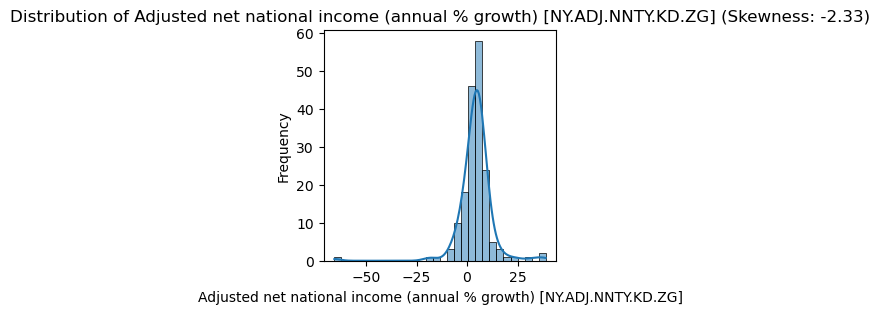

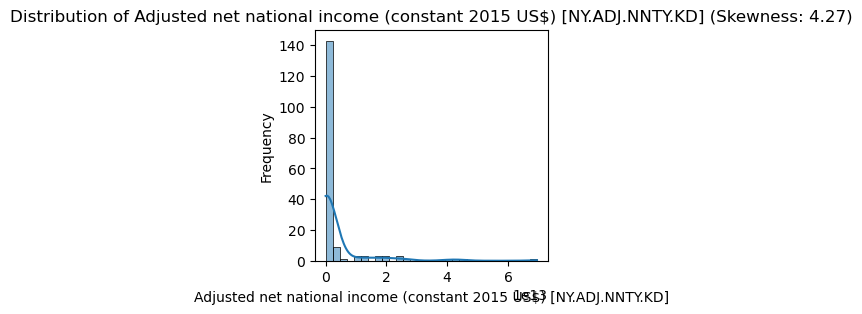

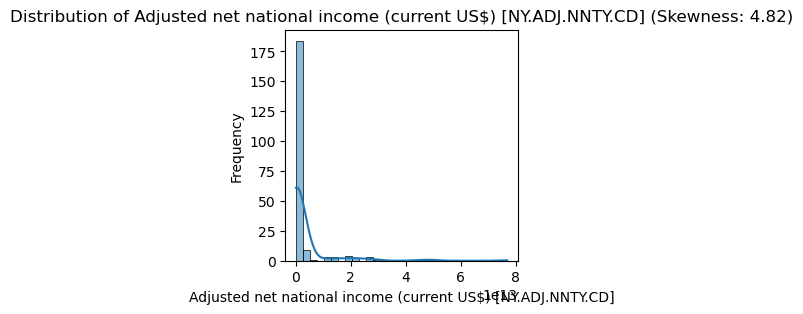

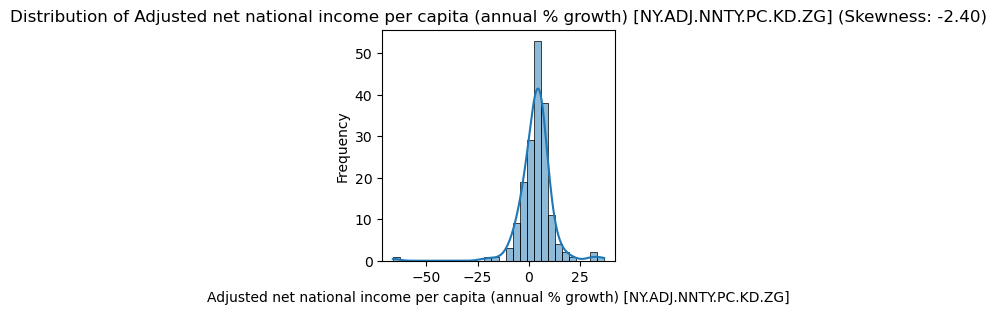

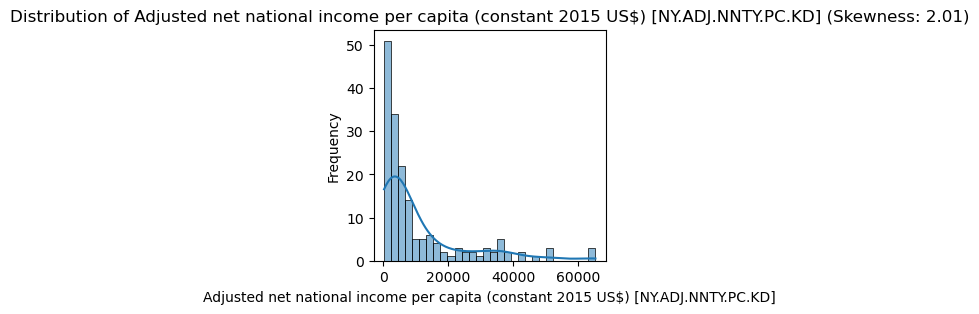

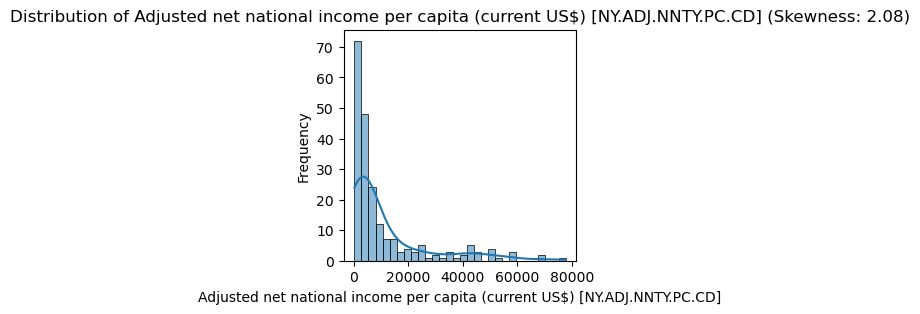

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot skewness of each column individually
for column in countryIndi.drop(columns=['Country Name', 'Country Code', 'Time','Time Code']).columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(countryIndi[column], kde=True, bins=30)
    plt.title(f"Distribution of {column} (Skewness: {skewness[column]:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [78]:
# let us do Log Tranformation since data is highly skewed 
from scipy.stats import boxcox

def apply_transformation(df):
    for col in df.drop(columns=['Country Name', 'Country Code', 'Time','Time Code']).columns:
        skewness = df[col].skew()
        
        if abs(skewness) > 1:  # Highly Skewed
            if (df[col] <= 0).any():
                print(f"Skipping Log for {col} (Negative/Zero values present)")
                df[col] = np.cbrt(df[col])  # Use Cube Root instead
            else:
                df[col] = np.log1p(df[col])  # Log Transformation
        
        elif 0.5 <= abs(skewness) <= 1:  # Moderately Skewed
            df[col] = np.sqrt(df[col])  # Square Root Transformation
            
        print(f"Applied transformation to {col}: Skewness = {skewness:.2f}")

apply_transformation(countryIndi)


Skipping Log for Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG] (Negative/Zero values present)
Applied transformation to Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]: Skewness = -2.33
Applied transformation to Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]: Skewness = 4.27
Applied transformation to Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]: Skewness = 4.82
Skipping Log for Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG] (Negative/Zero values present)
Applied transformation to Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]: Skewness = -2.40
Applied transformation to Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]: Skewness = 2.01
Applied transformation to Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]: Skewness = 2.08


In [79]:
new_skewness = countryIndi.drop(columns=['Country Name', 'Country Code', 'Time','Time Code']).skew()
print(new_skewness)


Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]                 -1.526778
Adjusted net national income (constant 2015 US$) [NY.ADJ.NNTY.KD]                   0.303862
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]                         0.283061
Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]   -1.114905
Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]    -0.047978
Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]           0.087812
dtype: float64


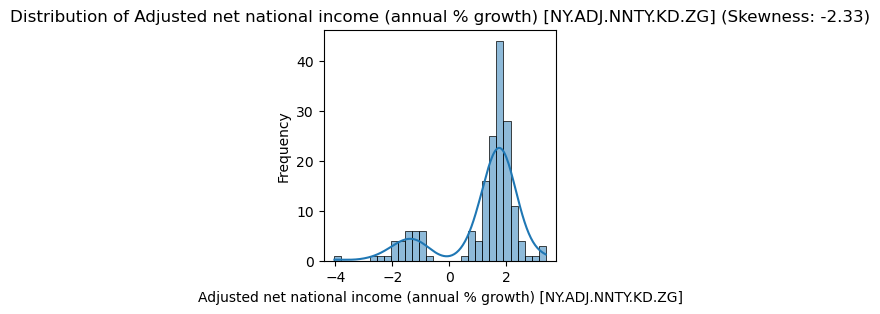

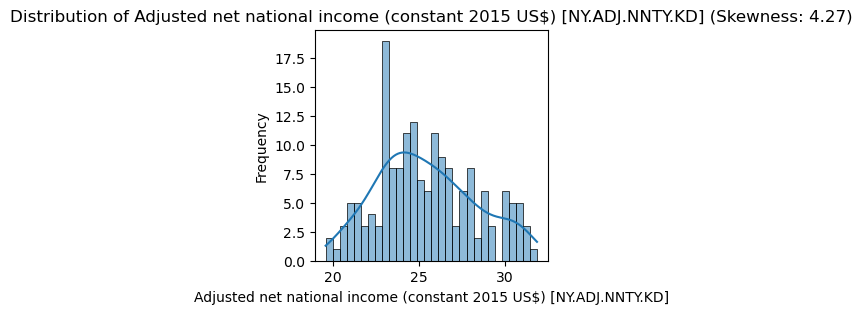

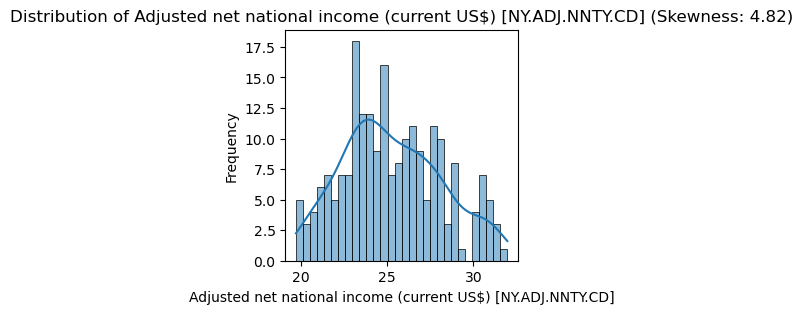

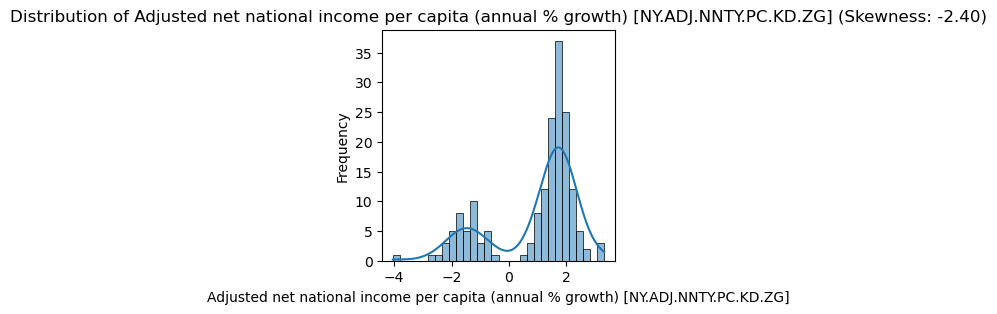

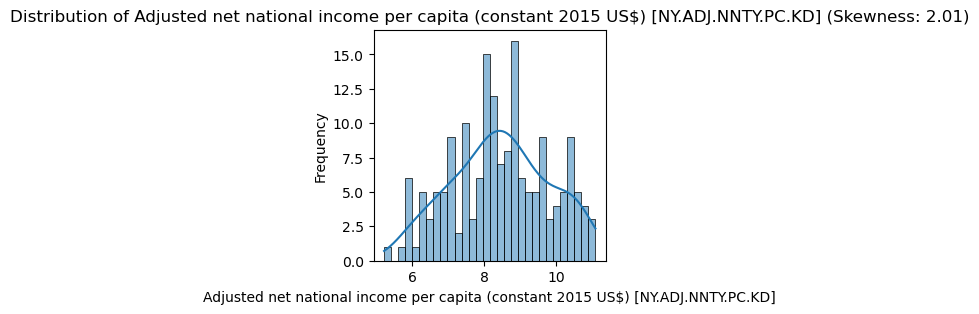

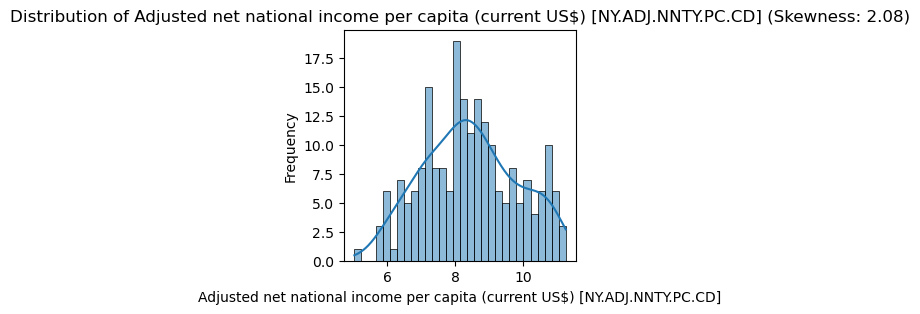

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot skewness of each column individually
for column in countryIndi.drop(columns=['Country Name', 'Country Code', 'Time','Time Code']).columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(countryIndi[column], kde=True, bins=30)
    plt.title(f"Distribution of {column} (Skewness: {skewness[column]:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
